In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

df=pd.read_excel('measurements2.xlsx')

print(df.head()) ##test masuk gak codenya
#prediksi petrol consumption


   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


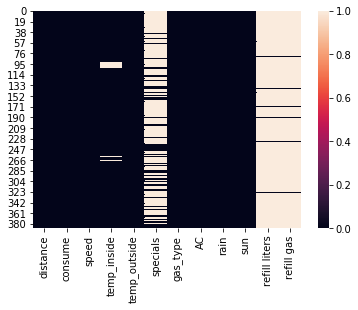

In [38]:
sns.heatmap(df.isnull())

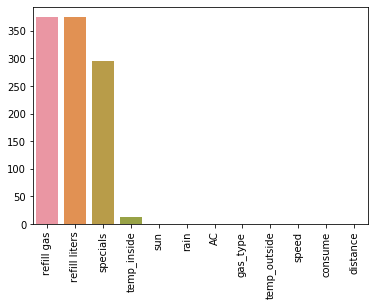

In [39]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(null_values.index,null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

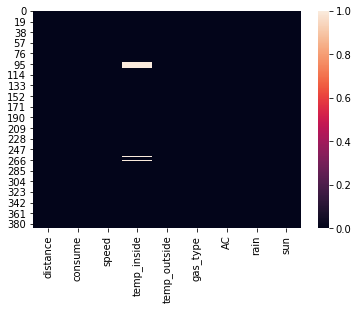

In [40]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

In [41]:
temp_inside_mean=np.mean(df['temp_inside'])
print(temp_inside_mean)

21.929521276595743


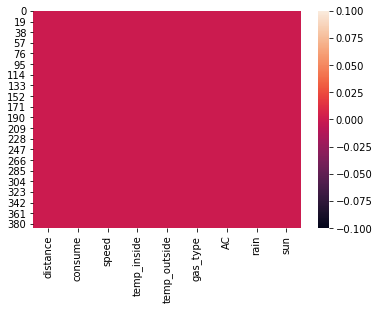

In [42]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)
sns.heatmap(df.isnull())

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x=df.drop(['consume','gas_type'],axis=1)
y=df['consume']
l.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred=l.predict(x_test)
print(l.coef_,l.intercept_)

[ 0.00523674 -0.02371772 -0.14711979 -0.03724498  0.41456804  0.61676684
 -0.06407861] 9.389308142257125


In [46]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.7424532609047081
0.6635761182069627
0.8616572757800564


In [47]:
dum1=pd.get_dummies(df['gas_type'])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [48]:
df=pd.concat([df,dum1],axis=1)
df.drop('gas_type',axis=1,inplace=True)
x1=df.drop('consume',axis=1)
y1=df['consume']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [50]:
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

[4.80398179 5.24631572 5.16373706 5.23299719 4.52776021 5.99062392
 5.73193936 5.23198354 5.8898096  4.94684204 4.0800537  4.78422755
 6.55357901 4.50083061 5.1268724  5.24267179 5.61167026 5.14823973
 5.48324723 5.36437201 4.13422549 5.30350959 4.94565881 5.23290799
 4.88631664 4.79418748 4.55506668 4.28205093 5.10144732 3.90735262
 4.97478302 5.29391251 4.75042548 4.56699402 5.53113778 5.02945576
 4.6453334  4.03415275 5.10287619 6.16080817 4.47545803 5.28255966
 5.37539962 4.41278157 4.69332325 4.39387259 5.10382269 5.1927726
 4.95992397 4.98995489 4.87121094 5.4268889  5.44648531 5.28120341
 4.61905757 4.90286809 6.70123899 5.3534319  4.71689758 4.78621524
 5.50574979 4.9290579  4.55311849 4.81518093 4.36022913 4.75672285
 5.55769604 4.34876836 4.82767226 4.91585314 4.28138845 4.6582407
 5.19170002 4.97280779 5.18528042 4.79819291 5.32165909 5.10687874
 5.38921307 5.15592614 5.26829591 5.45539801 4.47960294 5.3509791
 5.71243061 4.42243076 5.53113325 5.74565111 5.1678087  4.5763415

In [52]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

0.864693406954018
